In [1]:
# autoreload libaries
%load_ext autoreload
%autoreload 2

In [2]:
import data_load
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime, timedelta


In [3]:
cdc_frames = data_load.get_cdc_dataframe ()
jhu_frames = data_load.get_jhu_dataframe ()
jhu_weekly_df = data_load.get_jhu_dataframe_weekly ()
baseline2_df = data_load.get_linear_baseline()

In [3]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [22]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [20]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [24]:
print(sns.color_palette("Set2").as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [4]:
!pip install seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# First

In [28]:
start = "2020-07-03"
end = "2020-08-31"
stats={}
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    stats[model]={}
    stats[model]["mae"] , stats[model]["pred_count"]= data_load.get_mae(model_frame, jhu_weekly_df, start, end)
    
stats["linear_baseline"] = {}
stats["linear_baseline"]["mae"] , stats["linear_baseline"]["pred_count"] = data_load.get_mae(baseline2_df, jhu_weekly_df, start, end)

stat_df =  pd.DataFrame.from_dict(stats,orient='index')
stat_df = stat_df[stat_df.pred_count!=0]
stat_df = stat_df[stat_df.pred_count>= stat_df.pred_count.value_counts().idxmax()/4]
stat_df = stat_df.sort_values("mae", ascending=True)[:-2]
stat_df.reset_index(inplace=True)
stat_df

,index,mae,pred_count
0,Columbia_UNC-SurvCon,15.31,5
1,CovidAnalytics-DELPHI,22.61,5
2,DDS-NBDS,25.10,2
3,LANL-GrowthRate,31.99,5
4,QJHong-Encounter,32.35,2
5,COVIDhub-baseline,35.65,6
6,IowaStateLW-STEM,36.55,5
7,USACE-ERDC_SEIR,37.33,5
8,UCLA-SuEIR,37.35,5
9,JHU_IDD-CovidSP,45.32,5


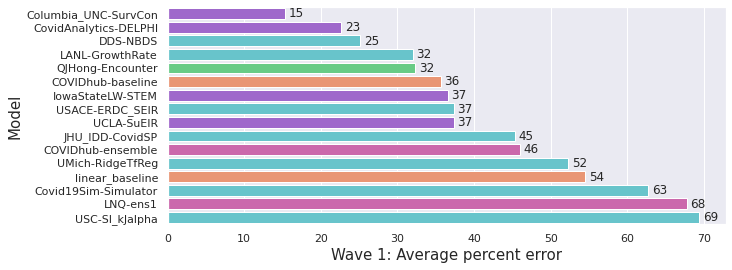

In [30]:
FIG_NAME = "MAE_FIRST_WAVE"
TS = 'Wave 1'

FIG_SIZE = (10,4)
b1_gap = .5
b2_gap = .5

b1_vgap = 2
b2_vgap = 2


plot_df = stat_df

#baseline1 = stat_df[stat_df["index"]=="COVIDhub-baseline"].mae.to_numpy()[0]
#plot_df = stat_df[stat_df["index"]!="COVIDhub-baseline"]

#baseline2 = plot_df[stat_df["index"]=="linear_baseline"].mae.to_numpy()[0]
#plot_df = plot_df[stat_df["index"]!="linear_baseline"]


color_array = list(map(data_load.get_model_type_color, plot_df["index"].values))
sns.set(rc={'figure.figsize':FIG_SIZE})

ax = sns.barplot(x=plot_df["mae"], y=plot_df["index"], palette=color_array)
ax.set_xlabel(f'{TS}: Average percent error',fontsize=15);
ax.set_ylabel('Model',fontsize=15);

#ax.axvline(baseline1, ls="--", lw="2")
#plt.text(baseline1+b1_gap,b1_vgap,'Baseline 1',rotation=90)

#ax.axvline(baseline2, ls="--", lw="2")
#plt.text(baseline2+b2_gap,b2_vgap,'Baseline 2',rotation=90)

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)

    ax.text(
        x = width+0.5,
        y = p.get_y()+(height/2), 
        s = "{:.0f}".format(width), 
        va = "center"
    )

plt.savefig('plots/'+FIG_NAME+'.png', bbox_inches='tight', dpi=150)

# Second

In [11]:
start = "2020-09-01"
end = "2021-02-14"
stats={}
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    stats[model]={}
    stats[model]["mae"] , stats[model]["pred_count"]= data_load.get_mae(model_frame, jhu_weekly_df, start, end)
    
stats["linear_baseline"] = {}
stats["linear_baseline"]["mae"] , stats["linear_baseline"]["pred_count"] = data_load.get_mae(baseline2_df, jhu_weekly_df, start, end)

stat_df =  pd.DataFrame.from_dict(stats,orient='index')
stat_df = stat_df[stat_df.pred_count!=0]
stat_df = stat_df[stat_df.pred_count>= stat_df.pred_count.value_counts().idxmax()/4]
stat_df = stat_df.sort_values("mae", ascending=True)[:-2]
stat_df.reset_index(inplace=True)
stat_df

,index,mae,pred_count
0,UCF-AEM,27.65,8
1,JHU_CSSE-DECOM,31.20,6
2,LNQ-ens1,32.11,22
3,COVIDhub-ensemble,32.63,22
4,QJHong-Encounter,32.67,22
5,BPagano-RtDriven,33.07,12
6,IowaStateLW-STEM,33.63,21
7,Microsoft-DeepSTIA,34.81,6
8,COVIDhub-baseline,34.87,22
9,CEID-Walk,36.56,20


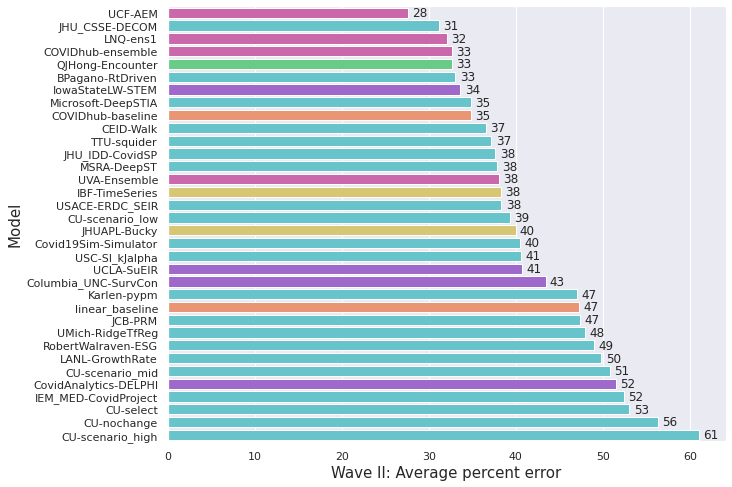

In [27]:
FIG_NAME = "MAE_SECOND_WAVE"
TS = 'Wave II'
FIG_SIZE = (10,8)
b1_gap = .5
b2_gap = -1.5

b1_vgap = 10
b2_vgap = 10

plot_df = stat_df

#baseline1 = stat_df[stat_df["index"]=="COVIDhub-baseline"].mae.to_numpy()[0]
#plot_df = stat_df[stat_df["index"]!="COVIDhub-baseline"]

#baseline2 = plot_df[stat_df["index"]=="linear_baseline"].mae.to_numpy()[0]
#plot_df = plot_df[stat_df["index"]!="linear_baseline"]


color_array = list(map(data_load.get_model_type_color, plot_df["index"].values))
sns.set(rc={'figure.figsize':FIG_SIZE})

ax = sns.barplot(x=plot_df["mae"], y=plot_df["index"], palette=color_array)
ax.set_xlabel(f'{TS}: Average percent error',fontsize=15);
ax.set_ylabel('Model',fontsize=15);

#ax.axvline(baseline1, ls="--", lw="2")
#plt.text(baseline1+b1_gap,b1_vgap,'Baseline 1',rotation=90)

#ax.axvline(baseline2, ls="--", lw="2")
#plt.text(baseline2+b2_gap,b2_vgap,'Baseline 2',rotation=90)

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)

    ax.text(
        x = width+0.5,
        y = p.get_y()+(height/2), 
        s = "{:.0f}".format(width), 
        va = "center"
    )

plt.savefig('plots/'+FIG_NAME+'.png', bbox_inches='tight', dpi=150)

# Third

In [31]:
start = "2021-02-15"
end = "2021-07-26"
stats={}
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    stats[model]={}
    stats[model]["mae"] , stats[model]["pred_count"]= data_load.get_mae(model_frame, jhu_weekly_df, start, end)
    
stats["linear_baseline"] = {}
stats["linear_baseline"]["mae"] , stats["linear_baseline"]["pred_count"] = data_load.get_mae(baseline2_df, jhu_weekly_df, start, end)

stat_df =  pd.DataFrame.from_dict(stats,orient='index')
stat_df = stat_df[stat_df.pred_count!=0]
stat_df = stat_df[stat_df.pred_count>= stat_df.pred_count.value_counts().idxmax()/4]
stat_df = stat_df.sort_values("mae", ascending=True)[:-2]
stat_df.reset_index(inplace=True)
stat_df

,index,mae,pred_count
0,USC-SI_kJalpha,38.76,24
1,CU-scenario_low,47.94,24
2,LANL-GrowthRate,48.17,23
3,LNQ-ens1,49.30,21
4,MUNI-ARIMA,50.20,8
5,JHUAPL-Bucky,53.82,24
6,TTU-squider,54.48,24
7,Covid19Sim-Simulator,54.86,24
8,COVIDhub-trained_ensemble,55.19,14
9,SigSci-TS,56.57,13


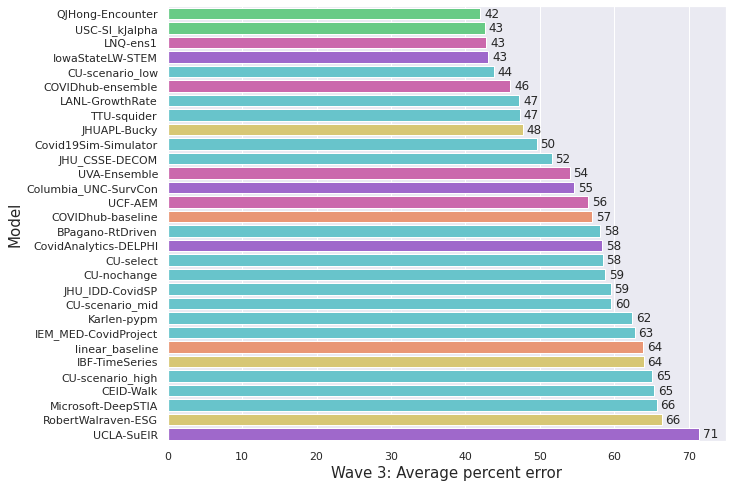

In [40]:
FIG_NAME = "MAE_THIRD_WAVE"
TS = 'Wave 3'
FIG_SIZE = (10,8)
b1_gap = 1
b2_gap = 1

b1_vgap = 4.5
b2_vgap = 4.5

plot_df = stat_df

#baseline1 = stat_df[stat_df["index"]=="COVIDhub-baseline"].mae.to_numpy()[0]
#plot_df = stat_df[stat_df["index"]!="COVIDhub-baseline"]

#baseline2 = plot_df[stat_df["index"]=="linear_baseline"].mae.to_numpy()[0]
#plot_df = plot_df[stat_df["index"]!="linear_baseline"]


color_array = list(map(data_load.get_model_type_color, plot_df["index"].values))
sns.set(rc={'figure.figsize':FIG_SIZE})

ax = sns.barplot(x=plot_df["mae"], y=plot_df["index"], palette=color_array)
ax.set_xlabel(f'{TS}: Average percent error',fontsize=15);
ax.set_ylabel('Model',fontsize=15);

#ax.axvline(baseline1, ls="--", lw="2")
#plt.text(baseline1+b1_gap,b1_vgap,'Baseline 1',rotation=90)

#ax.axvline(baseline2, ls="--", lw="2")
#plt.text(baseline2+b2_gap,b2_vgap,'Baseline 2',rotation=90)

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)

    ax.text(
        x = width+0.5,
        y = p.get_y()+(height/2), 
        s = "{:.0f}".format(width), 
        va = "center"
    )

plt.savefig('plots/'+FIG_NAME+'.png', bbox_inches='tight', dpi=150)

# OVERALL

In [36]:
start = "2020-02-15"
end = "2021-08-26"
stats={}
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    stats[model]={}
    stats[model]["mae"] , stats[model]["pred_count"]= data_load.get_mae(model_frame, jhu_weekly_df, start, end)
    
stats["linear_baseline"] = {}
stats["linear_baseline"]["mae"] , stats["linear_baseline"]["pred_count"] = data_load.get_mae(baseline2_df, jhu_weekly_df, start, end)

stat_df =  pd.DataFrame.from_dict(stats,orient='index')
stat_df = stat_df[stat_df.pred_count!=0]
stat_df = stat_df[stat_df.pred_count>= stat_df.pred_count.value_counts().idxmax()/2]
stat_df = stat_df.sort_values("mae", ascending=True)[:-2]
stat_df.reset_index(inplace=True)
stat_df

,index,mae,pred_count
0,QJHong-Encounter,41.99,34
1,USC-SI_kJalpha,42.57,51
2,LNQ-ens1,42.82,47
3,IowaStateLW-STEM,43.08,41
4,CU-scenario_low,43.82,46
5,COVIDhub-ensemble,46.03,49
6,LANL-GrowthRate,47.23,49
7,TTU-squider,47.31,41
8,JHUAPL-Bucky,47.70,43
9,Covid19Sim-Simulator,49.58,50


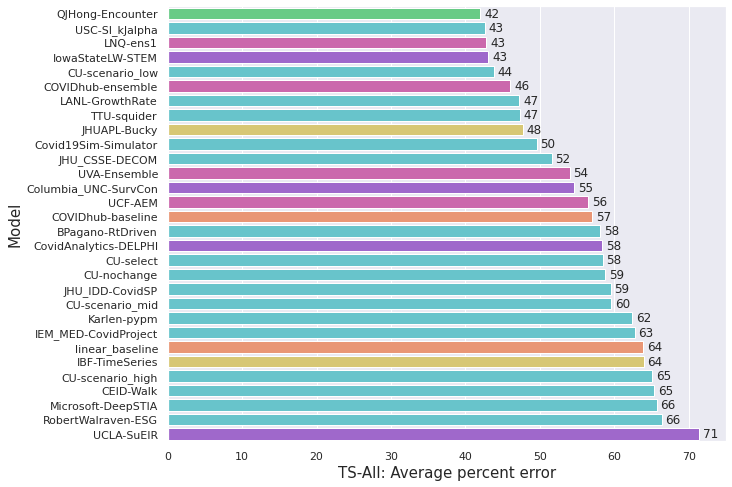

In [37]:
FIG_NAME = "MAE_OVERALL_WAVE"
TS = 'TS-All'
b1_gap = .5
b2_gap = 1.5

b1_vgap = 3.5
b2_vgap = 3.5


plot_df = stat_df

#baseline1 = stat_df[stat_df["index"]=="COVIDhub-baseline"].mae.to_numpy()[0]
#plot_df = stat_df[stat_df["index"]!="COVIDhub-baseline"]

#baseline2 = plot_df[stat_df["index"]=="linear_baseline"].mae.to_numpy()[0]
#plot_df = plot_df[stat_df["index"]!="linear_baseline"]


color_array = list(map(data_load.get_model_type_color, plot_df["index"].values))
sns.set(rc={'figure.figsize':FIG_SIZE})

ax = sns.barplot(x=plot_df["mae"], y=plot_df["index"], palette=color_array)
ax.set_xlabel(f'{TS}: Average percent error',fontsize=15);
ax.set_ylabel('Model',fontsize=15);

#ax.axvline(baseline1, ls="--", lw="2")
#plt.text(baseline1+b1_gap,b1_vgap,'Baseline 1',rotation=90)

#ax.axvline(baseline2, ls="--", lw="2")
#plt.text(baseline2+b2_gap,b2_vgap,'Baseline 2',rotation=90)

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)

    ax.text(
        x = width+0.5,
        y = p.get_y()+(height/2), 
        s = "{:.0f}".format(width), 
        va = "center"
    )

plt.savefig('plots/'+FIG_NAME+'.png', bbox_inches='tight', dpi=150)

In [38]:
plot_df

,index,mae,pred_count
0,QJHong-Encounter,41.99,34
1,USC-SI_kJalpha,42.57,51
2,LNQ-ens1,42.82,47
3,IowaStateLW-STEM,43.08,41
4,CU-scenario_low,43.82,46
5,COVIDhub-ensemble,46.03,49
6,LANL-GrowthRate,47.23,49
7,TTU-squider,47.31,41
8,JHUAPL-Bucky,47.70,43
9,Covid19Sim-Simulator,49.58,50
